<table style="border: 0"><tr style="border: 0"><td style="border: 0"><img src="img/title_slide.png" width=300/></td><td style="border: 0"><a href="http://pandas.pydata.org/"><img src="img/pandas_logo.png" width=300/></a></td></tr></table>

# **`pandas`**

`pandas` is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. 

> The library’s name derives from **pan**el **da**ta, a common term for multidimensional data sets encountered in statistics and econometrics.  

-- Wes McKinney, ["*pandas: a Foundational Python Library for Data Analysis and Statistics*"](http://www.dlr.de/sc/Portaldata/15/Resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf), PyHPC 2011

```
pip install pandas
```

#### Contributors:

![GitHub Contributors](img/pandas_github_commits.png)

# Let's Dive In

**Montréal cycling data from Données Ouvertes Montréal**

This dataset is a list of how many people were on 
7 different bike paths in Montreal, each day.

In [1]:
import requests

url = (
    "https://raw.githubusercontent.com/jvns/"
    "pandas-cookbook/v0.1/data/bikes.csv")
dest = "data/bikes.csv"

r = requests.get(url)

with open(dest, 'wb') as fp:
    fp.write(r.content)

print(r.text[:630])

Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
01/01/2012;35;;0;38;51;26;10;16;
02/01/2012;83;;1;68;153;53;6;43;
03/01/2012;135;;2;104;248;89;3;58;
04/01/2012;144;;1;116;318;111;8;61;
05/01/2012;197;;2;124;330;97;13;95;
06/01/2012;146;;0;98;244;86;4;75;
07/01/2012;98;;2;80;108;53;6;54;
08/01/2012;95;;1;62;98;64;11;63;
09/01/2012;244;;2;165;432;198;12;173;
10/01/2012;397;;3;238;563;275;18;241;
11/01/2012;273;;0;182;443;258;12;194;
12/01/2012;157;;1;134;261;137;9;63;
13/01/2012;75;;0;41;105;64;2;0;


In [2]:
import pandas as pd

In [3]:
bikes_df = pd.read_csv(
    "data/bikes.csv",
    sep=';', 
    encoding='latin1', 
    parse_dates=['Date'], 
    dayfirst=True, 
    index_col='Date')

bikes_df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [4]:
bikes_df.describe()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
count,310.000000,0.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0.0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


In [5]:
bikes_df['Berri 1'].head()

Date
2012-01-01     35
2012-01-02     83
2012-01-03    135
2012-01-04    144
2012-01-05    197
Name: Berri 1, dtype: int64

In [6]:
import matplotlib
%matplotlib inline

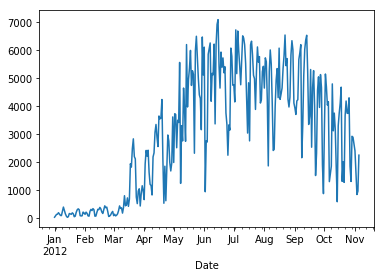

In [7]:
bikes_df['Berri 1'].plot();

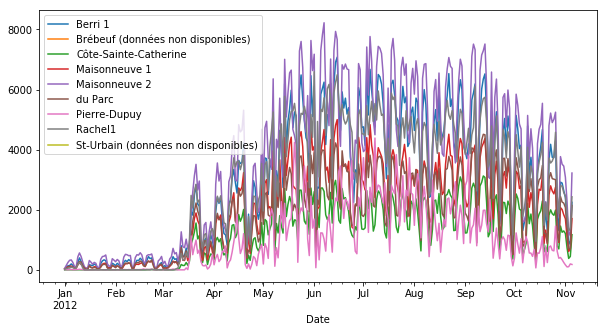

In [8]:
bikes_df.plot(figsize=(10,5));

## Backing up...

# Data Structures in Pandas
* **The Series** (1 dimensional sequence)
* **The DataFrame** (2 dimensional)
* **The Panel** (3 dimensional [index, major axis, minor axis])

## The Series

A one-dimensional labeled array capable of holding any data type

In [9]:
import numpy as np

s = pd.Series(np.random.randn(5), 
              index=['a', 'b', 'c', 'd', 'e'], 
              name='lucky numbers')
s

a   -0.590869
b   -0.468194
c    0.575670
d    0.010642
e   -1.207682
Name: lucky numbers, dtype: float64

* Name
* Index

#### The Series is like a **`dict`**

* Values can be get and set$^{*}$ by their index

In [10]:
s['b']

-0.46819439339430347

In [11]:
s.get('b')

-0.46819439339430347

In [12]:
s.get('z')

In [13]:
try:
    s['z']
except Exception as e:
    print(type(e))

<class 'KeyError'>


In [14]:
s['z'] = 7.7

In [15]:
s

a   -0.590869
b   -0.468194
c    0.575670
d    0.010642
e   -1.207682
z    7.700000
Name: lucky numbers, dtype: float64

#### The Series is **`np.ndarray`**-like

* Operations that work on a `np.ndarray` usually work on a `pd.Series`
* Slicing operations also slice the index

In [16]:
np.exp(s)

a       0.553846
b       0.626132
c       1.778321
d       1.010699
e       0.298889
z    2208.347992
Name: lucky numbers, dtype: float64

In [17]:
s[s > np.median(s)]

c    0.575670
d    0.010642
z    7.700000
Name: lucky numbers, dtype: float64

In [18]:
s[s > s.median()]

c    0.575670
d    0.010642
z    7.700000
Name: lucky numbers, dtype: float64

#### Vectorized Operations and Label Alignment

In [19]:
s+s

a    -1.181739
b    -0.936389
c     1.151340
d     0.021284
e    -2.415363
z    15.400000
Name: lucky numbers, dtype: float64

In [20]:
s_2 = pd.Series(np.random.randn(4), 
                index=['c', 'd', 'e', 'f'], 
                name='lucky numbers')
s_2

c   -1.438088
d    0.826518
e   -1.555912
f   -0.254488
Name: lucky numbers, dtype: float64

In [21]:
s+s_2

a         NaN
b         NaN
c   -0.862418
d    0.837160
e   -2.763593
f         NaN
z         NaN
Name: lucky numbers, dtype: float64

## The DataFrame

A 2-dimensional labeled data structure with columns of potentially different types.

In [22]:
bikes_df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


#### A `dict` of Series sharing a common Index:

In [23]:
bikes_df['Rachel1'].head()

Date
2012-01-01    16
2012-01-02    43
2012-01-03    58
2012-01-04    61
2012-01-05    95
Name: Rachel1, dtype: int64

In [24]:
bikes_df['All Maisonneuve'] = bikes_df['Maisonneuve 1'] + bikes_df['Maisonneuve 2']
bikes_df['Quiet Day'] = bikes_df['All Maisonneuve'] < 300
bikes_df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),All Maisonneuve,Quiet Day
Date,,,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN,89,True
2012-01-02,83,NaN,1,68,153,53,6,43,NaN,221,True
2012-01-03,135,NaN,2,104,248,89,3,58,NaN,352,False
2012-01-04,144,NaN,1,116,318,111,8,61,NaN,434,False
2012-01-05,197,NaN,2,124,330,97,13,95,NaN,454,False


In [25]:
del bikes_df['All Maisonneuve']
quiet_day_series = bikes_df.pop('Quiet Day')
quiet_day_series.head()

Date
2012-01-01     True
2012-01-02     True
2012-01-03    False
2012-01-04    False
2012-01-05    False
Name: Quiet Day, dtype: bool

#### Aside about "setting" with `pandas`

Assigning values on copies creates warnings by default

In [26]:
rachel1_series = bikes_df['Rachel1']
rachel1_series['2012-01-03'] = 60

/home/ubuntu/pandas_presentation/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
rachel1_series = bikes_df['Rachel1'].copy()
rachel1_series['2012-01-03'] = 60

#### More Advanced Column Computation

##### Using Functions

In [28]:
def normalize(a):
    return (a-a.mean())/a.std()

bikes_df.apply(normalize).head()  # Normalize each column

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,-1.359926,NaN,-1.305627,-1.340943,-1.392079,-1.378555,-0.981464,-1.401207,NaN
2012-01-02,-1.337799,NaN,-1.304568,-1.320263,-1.351032,-1.358293,-0.985223,-1.387967,NaN
2012-01-03,-1.313828,NaN,-1.303510,-1.295448,-1.312802,-1.331277,-0.988043,-1.379631,NaN
2012-01-04,-1.309679,NaN,-1.304568,-1.287176,-1.284633,-1.314767,-0.983344,-1.379141,NaN
2012-01-05,-1.285247,NaN,-1.303510,-1.281662,-1.279804,-1.325273,-0.978645,-1.362468,NaN


In [29]:
bikes_df.apply(normalize, axis=1).head()  # Normalize each row

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,0.557328,NaN,-1.421591,0.726950,1.461977,0.048463,-0.856185,-0.516942,NaN
2012-01-02,0.482067,NaN,-1.108200,0.191165,1.839613,-0.099738,-1.011233,-0.293673,NaN
2012-01-03,0.510738,NaN,-1.053396,0.146165,1.839663,-0.030241,-1.041636,-0.371293,NaN
2012-01-04,0.331404,NaN,-1.000865,0.070540,1.952486,0.023957,-0.935649,-0.441871,NaN
2012-01-05,0.659040,NaN,-1.067619,0.012650,1.836710,-0.226426,-0.970218,-0.244136,NaN


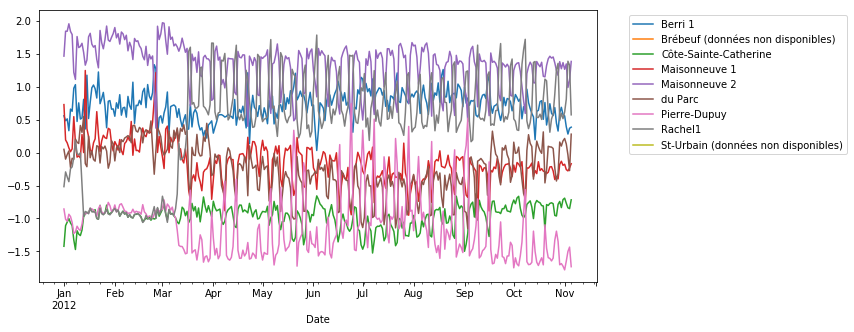

In [30]:
ax = bikes_df.apply(normalize, axis=1).plot(figsize=(10,5))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2);

# Getting Data

### Conveniences and Amenities

| Format Type | Data Description                                                      | Reader           | Writer         |
|-------------|-----------------------------------------------------------------------|------------------|----------------|
| text        | [CSV](https://en.wikipedia.org/wiki/Comma-separated_values)           | `read_csv`       | `to_csv`       |
| text        | [JSON](http://www.json.org/)                                          | `read_json`      | `to_json`      |
| text        | [HTML](https://en.wikipedia.org/wiki/HTML)                            | `read_html`      | `to_html`      |
| text        | Local clipboard                                                       | `read_clipboard` | `to_clipboard` |
| binary      | [MS Excel](https://en.wikipedia.org/wiki/Microsoft_Excel)             | `read_excel`     | `to_excel`     |
| binary      | [HDF5 Format](https://support.hdfgroup.org/HDF5/whatishdf5.html)      | `read_hdf`       | `to_hdf`       |
| binary      | [Feather Format](https://github.com/wesm/feather)                     | `read_feather`   | `to_feather`   |
| binary      | [Parquet Format](https://parquet.apache.org/)                         | `read_parquet`   | `to_parquet`   |
| binary      | [Msgpack](http://msgpack.org/index.html)                              | `read_msgpack`   | `to_msgpack`   |
| binary      | [Stata](https://en.wikipedia.org/wiki/Stata)                          | `read_stata`     | `to_stata`     |
| binary      | [SAS](https://en.wikipedia.org/wiki/SAS_%28software%29)                   | `read_sas`       |                |
| binary      | [Python Pickle Format](https://docs.python.org/3/library/pickle.html) | `read_pickle`    | `to_pickle`    |
| SQL         | [SQL](https://en.wikipedia.org/wiki/SQL)                              | `read_sql`       | `to_sql`       |
| SQL         | [Google Big Query](https://en.wikipedia.org/wiki/BigQuery)            | `read_gbq`       | `to_gbq`       |

### `read_csv()` signature:
[src](https://github.com/pandas-dev/pandas/blob/a00154dcfe5057cb3fd86653172e74b6893e337d/pandas/io/parsers.py#L557-L709)

[docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas-read-csv)

```
    def parser_f(filepath_or_buffer,
                 sep=sep,
                 delimiter=None,
```

```
                 # Column and Index Locations and Names
                 header='infer',
                 names=None,
                 index_col=None,
                 usecols=None,
                 squeeze=False,
                 prefix=None,
                 mangle_dupe_cols=True,
```

```
                 # General Parsing Configuration
                 dtype=None,
                 engine=None,
                 converters=None,
                 true_values=None,
                 false_values=None,
                 skipinitialspace=False,
                 skiprows=None,
                 nrows=None,
```

```
                 # NA and Missing Data Handling
                 na_values=None,
                 keep_default_na=True,
                 na_filter=True,
                 verbose=False,
                 skip_blank_lines=True,
```

```
                 # Datetime Handling
                 parse_dates=False,
                 infer_datetime_format=False,
                 keep_date_col=False,
                 date_parser=None,
                 dayfirst=False,
```

```
                 # Iteration
                 iterator=False,
                 chunksize=None,
```

```
                 # Quoting, Compression, and File Format
                 compression='infer',
                 thousands=None,
                 decimal=b'.',
                 lineterminator=None,
                 quotechar='"',
                 quoting=csv.QUOTE_MINIMAL,
                 escapechar=None,
                 comment=None,
                 encoding=None,
                 dialect=None,
                 tupleize_cols=None,
```

```
                 # Error Handling
                 error_bad_lines=True,
                 warn_bad_lines=True,
```

```
                 skipfooter=0,
                 skip_footer=0,  # deprecated
```

```
                 # Internal
                 doublequote=True,
                 delim_whitespace=False,
                 as_recarray=None,
                 compact_ints=None,
                 use_unsigned=None,
                 low_memory=_c_parser_defaults['low_memory'],
                 buffer_lines=None,
                 memory_map=False,
                 float_precision=None):
```

#### Reading In HTML Tables

FDIC Failed Bank List: http://www.fdic.gov/bank/individual/failed/banklist.html

In [31]:
import requests

failed_banks_url = (
    "http://www.fdic.gov/bank/individual/"
    "failed/banklist.html")

r = requests.get(failed_banks_url)

print(r.text[26600:27600])

col class="col1"/>
 		<col class="col2"/>
  		<col class="col3"/>
 		<col class="col4"/>
        <col class="col5"/>
  		<col class="col6"/>

        <thead>
			<tr>
				<th id="institution" scope="col" class="bank">Bank Name</th>
				<th id="city" 		 scope="col" class="city">City</th>
				<th id="state" 		 scope="col" class="st">ST</th>
				<th id="cert" 		 scope="col" class="cert">CERT</th>
				<th id="ai" 		 scope="col" class="ai">Acquiring Institution</th>    
				<th id="closing" 	 scope="col" class="closing">Closing Date</th>
				<th id="updated" 	 scope="col" class="updated">Updated Date</th>
			</tr>
            </thead>
            <tbody>
            
             <tr>
			  <td class="institution"><a href="wafedbank.html">Washington Federal Bank for Savings</a></td>
			  <td class="city">Chicago</td>
			  <td class="state">IL</td>
			  <td class="cert">30570</td>
			  <td class="ai">Royal Savings Bank</td>
			  <td class="closing">December 15, 2017</


In [32]:
failed_banks_df_list = pd.read_html(failed_banks_url)  # Returns DF list
failed_banks_df_list[0].head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 21, 2018"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","July 26, 2017"
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","December 5, 2017"


#### Working With JSON

##### Reading In

In [33]:
books_json = """
[
    {
        "id":"01",
        "language": "Java",
        "edition": "third",
        "author": "Herbert Schildt",
        "published_at": "March 29, 2005"
    },
    {
        "id":"07",
        "language": "C++",
        "edition": "second",
        "author": "E. Balagurusamy",
        "published_at": "May 29, 2001"
    }
]
"""

pd.read_json(books_json)

,author,edition,id,language,published_at
0,Herbert Schildt,third,1,Java,2005-03-29
1,E. Balagurusamy,second,7,C++,2001-05-29


In [34]:
from pandas.io.json import json_normalize

data = [{'state': 'Florida',
          'shortname': 'FL',
          'info': {
               'governor': 'Rick Scott'
          },
          'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
         {'state': 'Ohio',
          'shortname': 'OH',
          'info': {
               'governor': 'John Kasich'
          },
          'counties': [{'name': 'Summit', 'population': 1234},
                       {'name': 'Cuyahoga', 'population': 1337}]}]


json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


# Data Analysis

## Split-Apply-Combine

* Split -- _(self-explanatory)_
* Apply -- _some combination of:_
  * Aggregate
  * Transform
  * Filter
* Combine -- _(self-explanatory)_

#### Back to the Bikes

In [35]:
bikes_df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,60,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [36]:
bikes_df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq='D')

In [37]:
bikes_df.index.weekday_name

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday',
       ...
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday'],
      dtype='object', name='Date', length=310)

In [38]:
bikes_df['weekday'] = bikes_df.index.weekday_name
bikes_df['month'] = bikes_df.index.month
bikes_df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),weekday,month
Date,,,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN,Sunday,1
2012-01-02,83,NaN,1,68,153,53,6,43,NaN,Monday,1
2012-01-03,135,NaN,2,104,248,89,3,60,NaN,Tuesday,1
2012-01-04,144,NaN,1,116,318,111,8,61,NaN,Wednesday,1
2012-01-05,197,NaN,2,124,330,97,13,95,NaN,Thursday,1


#### Split: aka "GroupBy"
##### By Weekday

In [39]:
grouped_by_weekday = bikes_df.groupby('weekday', sort=False)
grouped_by_weekday.get_group('Tuesday').head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),weekday,month
Date,,,,,,,,,,,
2012-01-03,135,NaN,2,104,248,89,3,60,NaN,Tuesday,1
2012-01-10,397,NaN,3,238,563,275,18,241,NaN,Tuesday,1
2012-01-17,155,NaN,0,86,256,74,0,0,NaN,Tuesday,1
2012-01-24,299,NaN,1,189,444,174,4,0,NaN,Tuesday,1
2012-01-31,186,NaN,1,109,324,122,0,0,NaN,Tuesday,1


In [40]:
grouped_by_weekday['Rachel1'].describe()

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
Sunday,45.0,2603.333333,2014.706836,0.0,723.00,2477.0,4522.00,6170.0
Monday,45.0,2891.777778,2010.232538,0.0,846.00,3283.0,4709.00,5775.0
Tuesday,44.0,2729.318182,1939.244468,0.0,986.50,2760.5,4432.00,5952.0
Wednesday,44.0,3024.727273,2044.024705,0.0,480.75,3582.0,4777.75,5887.0
Thursday,44.0,3187.295455,2116.135108,0.0,844.00,3701.5,4993.50,6243.0
Friday,44.0,3119.431818,2222.013621,0.0,1071.50,3807.0,5176.75,6595.0
Saturday,44.0,2564.272727,1964.864719,0.0,944.75,2316.0,4482.00,6026.0


##### GroupBy a function

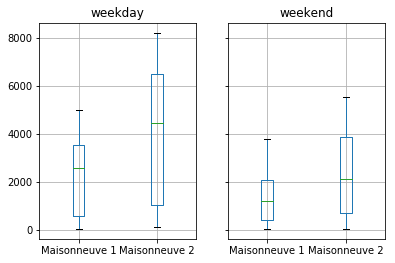

In [41]:
def weekday_vs_weekend(date):
    if date.weekday_name in ['Saturday', 'Sunday']:
        return "weekend"
    return "weekday"


bikes_df.groupby(weekday_vs_weekend).boxplot(column=['Maisonneuve 1', 'Maisonneuve 2']);

##### Grouping Columns by Name

In [42]:
def has_diacritic(col_name):
    diacritical_letters = ["ô", "é"]
    if any([letter in col_name for letter in diacritical_letters]):
        return "has_diacritic"
    return "does_not_have_diacritic"


bikes_df.groupby(has_diacritic, axis=1).describe()

count  \
does_not_have_diacritic Berri 1                              310.0   
                        Maisonneuve 1                        310.0   
                        Maisonneuve 2                        310.0   
                        du Parc                              310.0   
                        Pierre-Dupuy                         310.0   
                        Rachel1                              310.0   
                        month                                310.0   
has_diacritic           Brébeuf (données non disponibles)      0.0   
                        Côte-Sainte-Catherine                310.0   
                        St-Urbain (données non disponibles)    0.0   

                                                                    mean  \
does_not_have_diacritic Berri 1                              2985.048387   
                        Maisonneuve 1                        1983.325806   
                        Maisonneuve 2                        3510.261290   
                        du Parc                              1862.983871   
                        Pierre-Dupuy                         1054.306452   
                        Rachel1                              2873.490323   
                        month                                   5.603226   
has_diacritic           Brébeuf (données non disponibles)            NaN   
                        Côte-Sainte-Catherine                1233.351613   
                        St-Urbain (données non disponibles)          NaN   

                                                                     std  \
does_not_have_diacritic Berri 1                              2169.271062   
                        Maisonneuve 1                        1450.715170   
                        Maisonneuve 2                        2484.959789   
                        du Parc                              1332.543266   
                        Pierre-Dupuy                         1064.029205   
                        Rachel1                              2039.306572   
                        month                                   2.937425   
has_diacritic           Brébeuf (données non disponibles)            NaN   
                        Côte-Sainte-Catherine                 944.643188   
                        St-Urbain (données non disponibles)          NaN   

                                                              min     25%  \
does_not_have_diacritic Berri 1                              32.0  596.00   
                        Maisonneuve 1                        33.0  427.00   
                        Maisonneuve 2                        47.0  831.00   
                        du Parc                              18.0  474.75   
                        Pierre-Dupuy                          0.0   53.25   
                        Rachel1                               0.0  731.00   
                        month                                 1.0    3.00   
has_diacritic           Brébeuf (données non disponibles)     NaN     NaN   
                        Côte-Sainte-Catherine                 0.0  243.25   
                        St-Urbain (données non disponibles)   NaN     NaN   

                                                                50%      75%  \
does_not_have_diacritic Berri 1                              3128.0  4973.25   
                        Maisonneuve 1                        2019.5  3168.25   
                        Maisonneuve 2                        3688.5  5731.75   
                        du Parc                              1822.5  3069.00   
                        Pierre-Dupuy                          704.0  1818.50   
                        Rachel1                              3223.5  4717.25   
                        month                                   6.0     8.00   
has_diacritic           Brébeuf (données non disponibles)       NaN      NaN   
                        Côte-Sainte-Catherine   

#### Apply:
##### Aggregation

Action on group returns one value per column

<img src="img/split_apply_aggregate.png" width=300>

In [43]:
grouped_by_weekday['Rachel1','Berri 1'].mean()

,Rachel1,Berri 1
weekday,,
Sunday,2603.333333,2206.888889
Monday,2891.777778,2984.400000
Tuesday,2729.318182,3075.113636
Wednesday,3024.727273,3476.636364
Thursday,3187.295455,3639.340909
Friday,3119.431818,3222.068182
Saturday,2564.272727,2308.590909


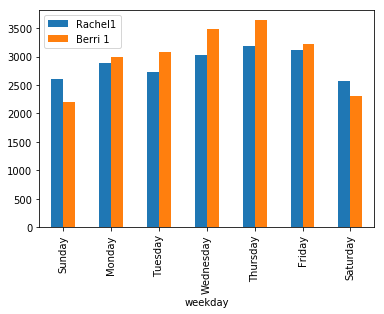

In [44]:
grouped_by_weekday['Rachel1','Berri 1'].mean().plot(kind='bar');

##### Transformation:

Action on group returns on same shape group

<img src="img/split_apply_transform.png" width=300>

In [45]:
def subtract_mean(s):
    return s-s.mean()

bikes_df.groupby('month').transform(subtract_mean).head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,-123.548387,NaN,-1.225806,-68.709677,-198.580645,-73.612903,4.83871,-20.83871,NaN
2012-01-02,-75.548387,NaN,-0.225806,-38.709677,-96.580645,-46.612903,0.83871,6.16129,NaN
2012-01-03,-23.548387,NaN,0.774194,-2.709677,-1.580645,-10.612903,-2.16129,23.16129,NaN
2012-01-04,-14.548387,NaN,-0.225806,9.290323,68.419355,11.387097,2.83871,24.16129,NaN
2012-01-05,38.451613,NaN,0.774194,17.290323,80.419355,-2.612903,7.83871,58.16129,NaN


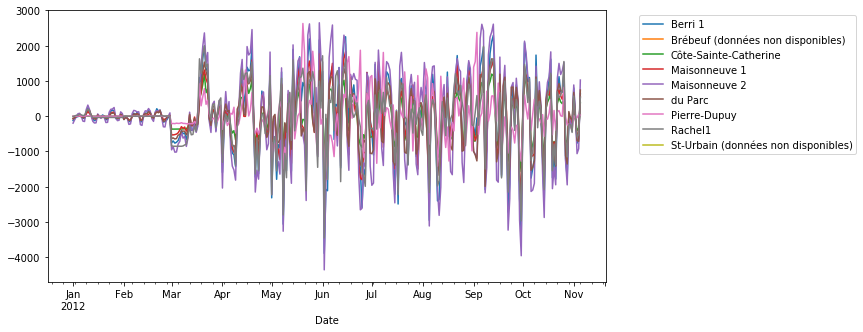

In [46]:
ax = bikes_df.groupby('month').transform(subtract_mean).plot(figsize=(10,5))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2);

##### Filtration

Original object is subset on a group-by-group basis

<img src="img/split_apply_filter.png" width=300>

In [47]:
grouped_by_month = bikes_df.groupby('month')
rachel1_high_traffic_months = grouped_by_month.filter(lambda x: x['Rachel1'].mean() > 1000).copy()
rachel1_high_traffic_months.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),weekday,month
Date,,,,,,,,,,,
2012-04-01,662,NaN,341,442,824,471,168,1086,NaN,Sunday,4
2012-04-02,1937,NaN,967,1537,2853,1614,394,2122,NaN,Monday,4
2012-04-03,2416,NaN,1078,1791,3556,1880,513,2450,NaN,Tuesday,4
2012-04-04,2211,NaN,933,1674,2956,1666,274,2242,NaN,Wednesday,4
2012-04-05,2424,NaN,1036,1823,3273,1699,355,2463,NaN,Thursday,4


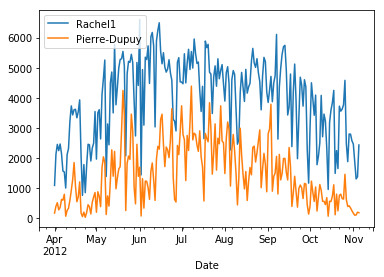

In [48]:
rachel1_high_traffic_months[['Rachel1','Pierre-Dupuy']].plot();

# Data Visualization

The `plot` method is a wrapper for `matplotlib.pyplot.plot`

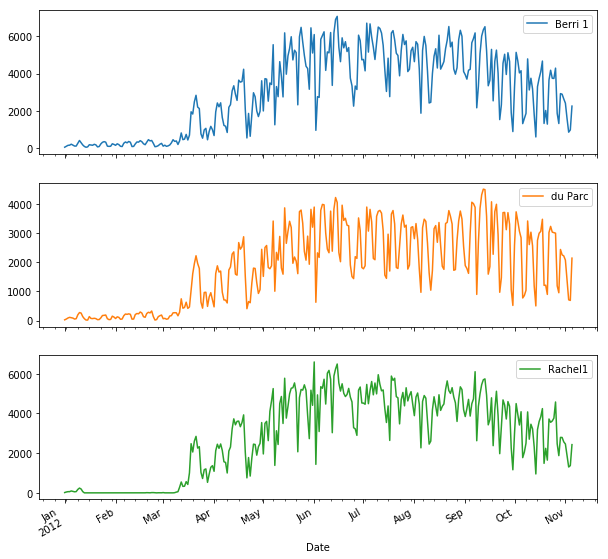

In [49]:
bikes_df[['Berri 1', 'du Parc', 'Rachel1']].plot(figsize=(10, 10), subplots=True);

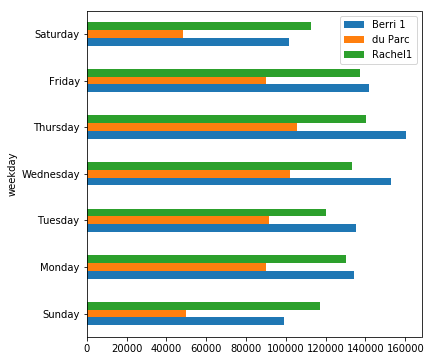

In [50]:
grouped_by_weekday['Berri 1', 'du Parc', 'Rachel1'].agg(sum).plot.barh(figsize=(6,6));

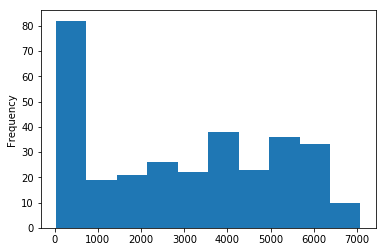

In [51]:
bikes_df['Berri 1'].plot.hist();

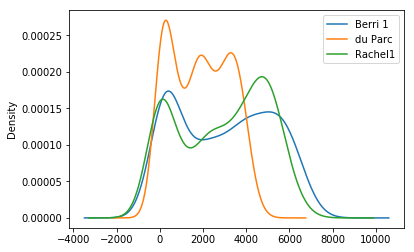

In [52]:
bikes_df[['Berri 1', 'du Parc', 'Rachel1']].plot.density();

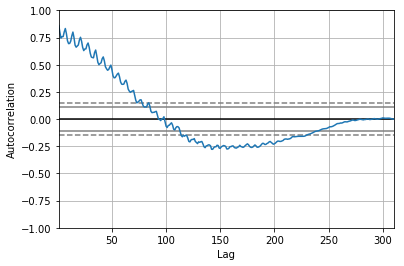

In [53]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(bikes_df[['Rachel1', 'du Parc']]);

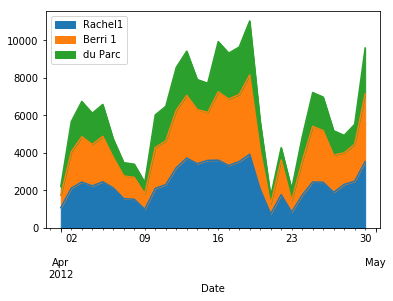

In [54]:
# Using query()
bikes_df.query('month == 4')[['Rachel1', 'Berri 1', 'du Parc']].plot.area();

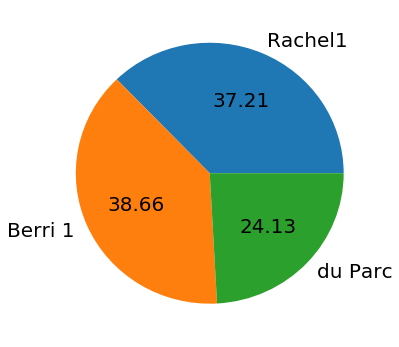

In [55]:
bikes_df[['Rachel1', 'Berri 1', 'du Parc']].mean().plot.pie(
    figsize=(6,6), autopct='%.2f', fontsize=20, label='');

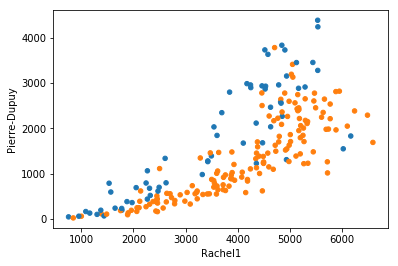

In [56]:
def color_map(index):
    return pd.Series(index).apply(
        lambda x: "tab:blue" if weekday_vs_weekend(x)=="weekend" else "tab:orange")

rachel1_high_traffic_months.plot.scatter(
    "Rachel1", "Pierre-Dupuy", 
    c=color_map(rachel1_high_traffic_months.index));

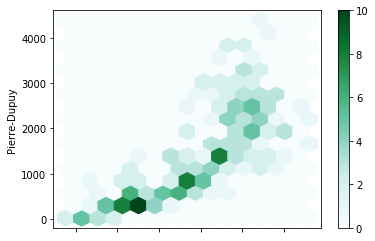

In [57]:
rachel1_high_traffic_months.plot.hexbin('Rachel1','Pierre-Dupuy', gridsize=15);

# Further Reading:

* [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Brandon Rhodes - pandas Tutorial](https://github.com/brandon-rhodes/pycon-pandas-tutorial) from PyCon 2015 -- including his [pandas Cheat Sheet](https://github.com/brandon-rhodes/pycon-pandas-tutorial/blob/master/cheat-sheet.txt)
* Chris Fonnesbeck's Advanced Statistical Computing course introduces pandas in [three (long) Jupyter Notebooks](http://nbviewer.jupyter.org/github/fonnesbeck/Bios8366/tree/master/notebooks/)
* Tom Augspurger has a series of blog posts covering advanced `pandas` usage called [Modern Pandas](http://tomaugspurger.github.io/modern-1-intro.html)

# References:

This talk took heavy inspiration from the following documentation and tutorials:
* [pandas 0.22.0 documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)
* [pandas Cookbook](https://github.com/jvns/pandas-cookbook) by Julia Evans

The `pandas` logo is provided by [NumFOCUS](https://www.numfocus.org/project/pandas).  
The split-apply-combine diagrams were inspired by [R Data Skills for Bioinformatics](https://eeob-biodata.github.io/R-Data-Skills/05-split-apply-combine/).

These slides were produced using [Jupyter Lab](https://github.com/jupyterlab/jupyterlab), a product of the [Jupyter Project](https://jupyter.org/). This talk was originally presented at the [Madison Python Meetup Group](http://www.madpy.com) on [May 10, 2018](https://www.meetup.com/MadPython/events/246869361/).

In [58]:
import sys
print(f'python {sys.version}')
print(f'pandas {pd.__version__}')
print(f'numpy {np.__version__}')
print(f'matplotlib {matplotlib.__version__}')
print(f'requests {requests.__version__}')

python 3.6.5 (default, Apr 27 2018, 15:43:16) 
[GCC 5.4.0 20160609]
pandas 0.22.0
numpy 1.14.3
matplotlib 2.2.2
requests 2.18.4


In [59]:
!pip freeze

backcall==0.1.0
beautifulsoup4==4.6.0
bleach==2.1.3
bs4==0.0.1
cycler==0.10.0
decorator==4.3.0
entrypoints==0.2.3
html5lib==1.0.1
ipykernel==4.8.2
ipython==6.3.1
ipython-genutils==0.2.0
jedi==0.12.0
Jinja2==2.10
jsonschema==2.6.0
jupyter-client==5.2.3
jupyter-core==4.4.0
jupyterlab==0.32.0
jupyterlab-launcher==0.10.5
kiwisolver==1.0.1
lxml==4.2.1
MarkupSafe==1.0
matplotlib==2.2.2
mistune==0.8.3
nbconvert==5.3.1
nbformat==4.4.0
notebook==5.4.1
numpy==1.14.2
pandas==0.22.0
pandocfilters==1.4.2
parso==0.2.0
pexpect==4.5.0
pickleshare==0.7.4
prompt-toolkit==1.0.15
ptyprocess==0.5.2
Pygments==2.2.0
pyparsing==2.2.0
python-dateutil==2.7.2
pytz==2018.4
pyzmq==17.0.0
Send2Trash==1.5.0
simplegeneric==0.8.1
six==1.11.0
terminado==0.8.1
testpath==0.3.1
tornado==5.0.2
traitlets==4.3.2
virtualenv==15.2.0
wcwidth==0.1.7
webencodings==0.5.1
